In [1]:
import os
os.chdir("C:/Disney")

**(1) Visualisation du fichier Hôtel Sequoia : 12650 avis depuis septembre 2012, 352 pour 2022 (au 18/12), soit près de 30 avis par mois.**

In [2]:
import pandas as pd
reviews=pd.read_csv("hotel_sequoia_clean.csv", sep=",")
reviews.info( ) #12650 avis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12650 entries, 0 to 12649
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   titre_commentaire  12650 non-null  object
 1   commentaire        12650 non-null  object
 2   Date_Avis          12650 non-null  object
 3   Ville              12649 non-null  object
 4   Pays               12650 non-null  object
 5   Date_Sejour        12650 non-null  object
 6   Note               12650 non-null  int64 
 7   Photo              12650 non-null  object
 8   langue             12650 non-null  object
dtypes: int64(1), object(8)
memory usage: 889.6+ KB


In [3]:
#Le fichier comprend des avis datés entre septembre 2012 et décembre 2022
reviews['Date_Avis'].tail(1)

12649    sept 2012
Name: Date_Avis, dtype: object

In [4]:
#on recherche la ligne du premier avis de 2022
reviews[reviews.isin(['janvier 2022'])].stack().tail(1)

351  Date_Sejour    janvier 2022
dtype: object

**(2) Ventilation des notes : seulement 32.4% des clients mettent une note de 5/5.**

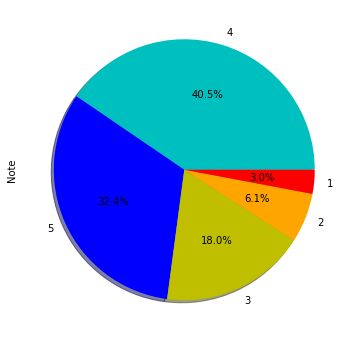

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
cols = ['c','b','y','orange','r']
reviews['Note'].value_counts().plot.pie(autopct='%1.1f%%', shadow= True,colors=cols)
plt.show()

In [12]:
p=pd.crosstab(reviews['Photo'],reviews['Note'],normalize=True)
print(p)

Note          1         2         3         4         5
Photo                                                  
no     0.025929  0.057233  0.166798  0.370435  0.291304
yes    0.003794  0.004111  0.013123  0.034387  0.032885


In [13]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
results=chi2_contingency(p)
chi2  = results[0] 
pv    = results[1]
free  = results[2]
efreq = results[3]
dfExpected = pd.DataFrame(efreq, columns=p.columns, index = p.index)
print(dfExpected)

Note          1         2         3         4         5
Photo                                                  
no     0.027099  0.055927  0.164034  0.369076  0.295564
yes    0.002625  0.005417  0.015887  0.035746  0.028626


In [14]:
print(chi2)
print(pv)

0.0021967872187864624
0.9999993972072833


**(3)Vectorisation**

In [6]:
import ast
liste=[ast.literal_eval(x) for x in reviews.commentaire]
from gensim.models import Word2Vec
modele = Word2Vec(liste,vector_size=2,window=5)
words= modele.wv
df =pd.DataFrame(words.vectors, columns=['V1','V2'], index=words.key_to_index.keys())

In [7]:
df.to_csv("words.vectors.txt",sep=";",header=True)

In [8]:
#(1) Mots-clés dégagés - Sélection des 50 premiers termes
dfMots= df[0:50]

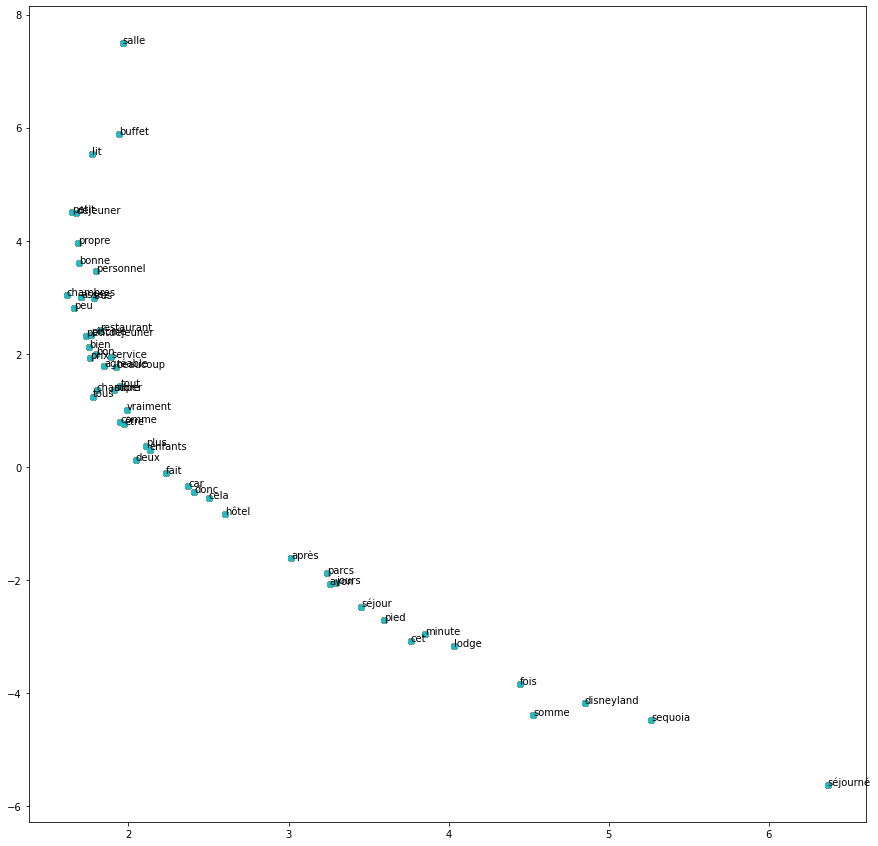

In [9]:
plt.figure(figsize=(15, 15))
for i in range(dfMots.shape[0]):
    plt.scatter(dfMots.V1,dfMots.V2,s=30)
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

In [10]:
#pour connaître les termes voisins d'un terme, par exemple d'un irritant :
words.most_similar("cher",topn=3)

[('possibilité', 1.0), ('reproche', 1.0), ('correspond', 1.0)]

In [66]:
#(2) Mots-clés dégagés - Sélection manuelle des thèmes dégagés (liste proche de celle de Marvel = généralisation possible)
mots = ['excellent','emplacement','personnel','dormir','impossible','boissons','restriction','personnel','inclus','conciergerie','réception','accueil','weekend','famille','piscine','bouilloire','prix','cher','loin','équipement','bébé','service','bon','bien','merveilleux','mauvaise','expérience','service','cher','baignoire','bouilloire','propre','propreté','manquait','poussière','cheveux','chambre','sommeil','buffet', 'déjeuner']
dfMots2= df.loc[mots, :]
dfMots2.head(10)

,V1,V2
excellent,1.999269,1.255146
emplacement,2.425822,0.032032
personnel,1.800487,3.468898
dormir,1.987703,1.016820
impossible,2.102768,1.622286
boissons,1.472756,5.913270
restriction,0.140449,0.559340
personnel,1.800487,3.468898
inclus,1.632077,2.177370
conciergerie,2.100902,1.695237


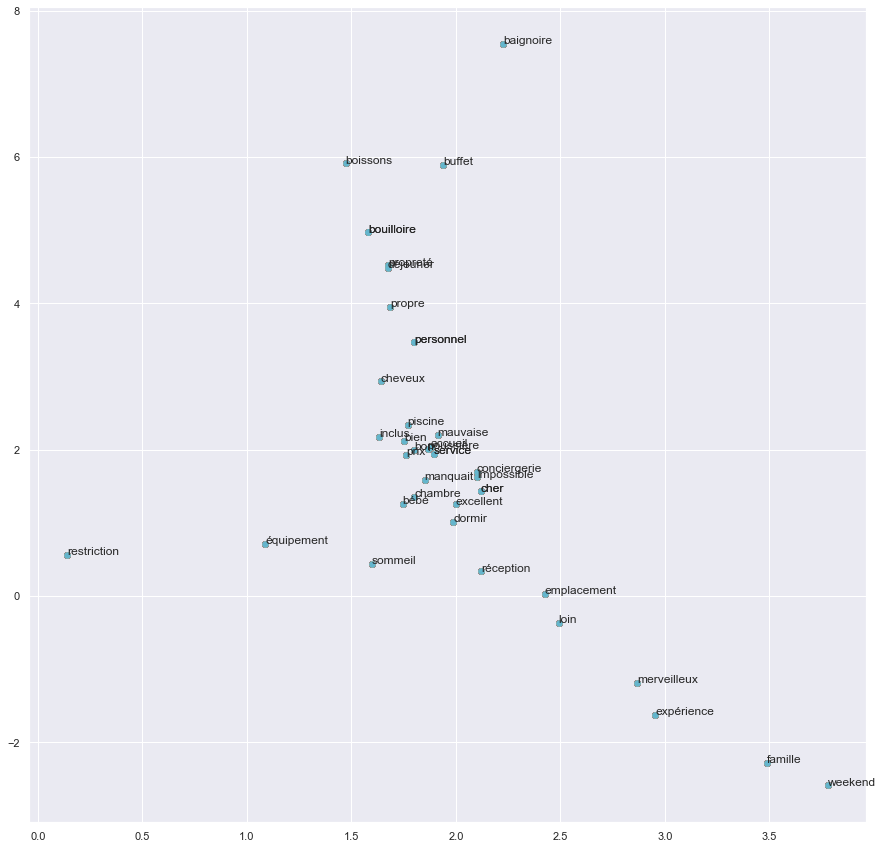

In [67]:
#graphique dans le plan

plt.figure(figsize=(15, 15))
for i in range(dfMots2.shape[0]):
    plt.scatter(dfMots2.V1,dfMots2.V2,s=30)
    plt.annotate(dfMots2.index[i],(dfMots2.V1[i],dfMots2.V2[i]))
plt.show()

In [61]:
words.most_similar('boissons',topn=10)

[('remous', 1.0),
 ('restriction', 0.9999980330467224),
 ('compétents', 0.9999966621398926),
 ('rattraper', 0.9999940395355225),
 ('présentation', 0.9999879002571106),
 ('dégageait', 0.9999871850013733),
 ('divertissement', 0.9999603033065796),
 ('ira', 0.9999484419822693),
 ('douche', 0.9999458193778992),
 ('fruit', 0.9999328255653381)]

In [69]:
words.most_similar('buffet',topn=15)

[('poudre', 1.0),
 ('sou', 0.9999998807907104),
 ('seul', 0.9999993443489075),
 ('ecoute', 0.9999985098838806),
 ('savon', 0.9999983310699463),
 ('placées', 0.9999983310699463),
 ('allume', 0.999998152256012),
 ('stressant', 0.9999957084655762),
 ('respectent', 0.9999948143959045),
 ('alliez', 0.9999914169311523),
 ('précision', 0.999990701675415),
 ('recouverts', 0.9999904632568359),
 ('consistait', 0.9999886155128479),
 ('maillot', 0.9999873042106628),
 ('gastronomie', 0.9999794960021973)]